## Import Files and Packages

In [92]:
import pandas as pd
import numpy as np

In [12]:
# Define file paths
concentrations_path = "RCMIP_Data/rcmip-concentrations-annual-means-v5-1-0.csv"
emissions_path = "RCMIP_Data/rcmip-emissions-annual-means-v5-1-0.csv"
forcing_path = "RCMIP_Data/rcmip-radiative-forcing-annual-means-v5-1-0.csv"

# Read CSVs as DataFrames
df_conc = pd.read_csv(concentrations_path)
df_emis = pd.read_csv(emissions_path)
df_forc = pd.read_csv(forcing_path)

## Visualize Atmospheric Concentration

In [38]:
# List of variables to keep
variables_to_keep = [
    "Atmospheric Concentrations|N2O",
    "Atmospheric Concentrations|CH4",
    "Atmospheric Concentrations|CO2"
]

# Filter the DataFrame by variable
df_conc_filtered = df_conc[df_conc['Variable'].isin(variables_to_keep)]

# Filter the DataFrame by region
df_conc_filtered = df_conc_filtered[df_conc_filtered['Region'] == 'World']

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_conc_filtered.columns] + \
                  [col for col in year_columns if col in df_conc_filtered.columns]

df_conc_filtered = df_conc_filtered[columns_to_keep]

# Display the filtered DataFrame
#print("Filtered Concentrations (1900-2100):")
#display(df_conc_filtered)

In [39]:
# Check df_conc_filtered for unique combinations of model and scenario
unique_model_scenario_combinations = df_conc_filtered[['Model', 'Scenario']].drop_duplicates()
print("Unique Model-Scenario Combinations:")
display(unique_model_scenario_combinations)


Unique Model-Scenario Combinations:


,Model,Scenario
0,AIM,rcp60
31,AIM,ssp370
160,AIM,ssp370-lowNTCF-aerchemmip
289,AIM,ssp370-lowNTCF-gidden
418,GCAM4,ssp434
547,GCAM4,ssp460
676,IMAGE,rcp26
707,IMAGE,ssp119
836,IMAGE,ssp126
965,MESSAGE,rcp85


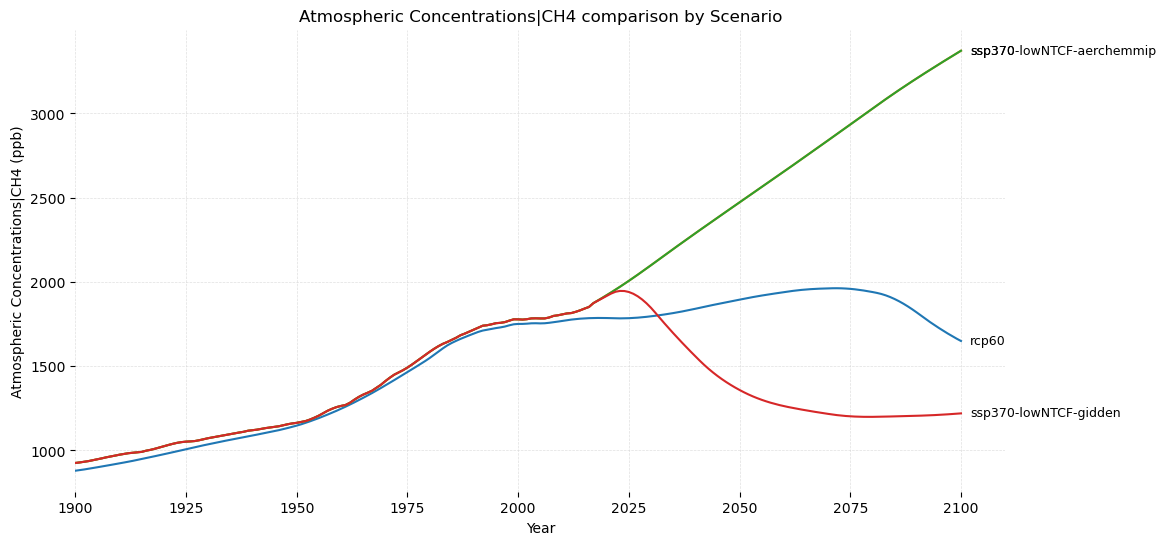

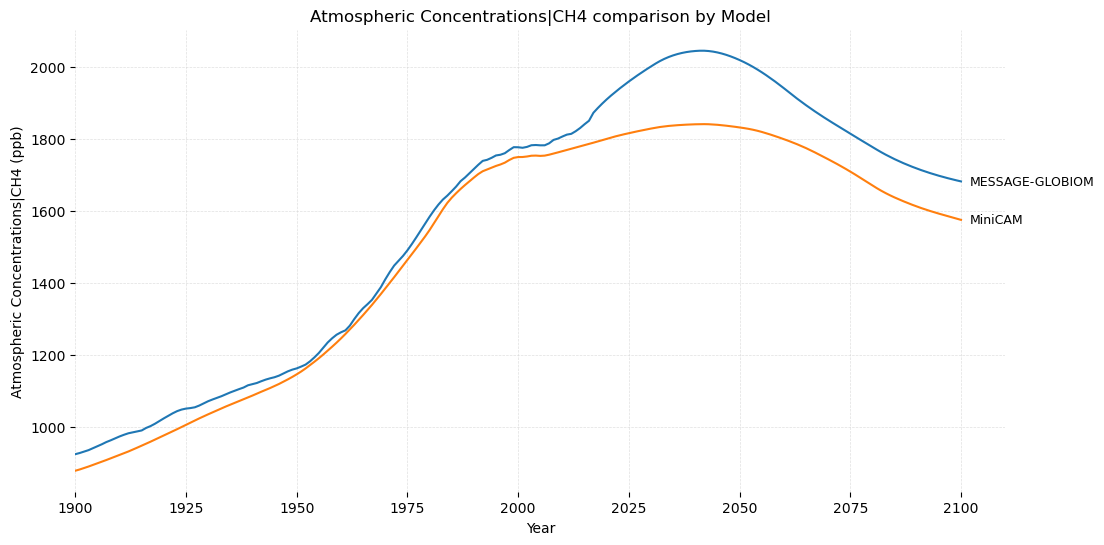

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


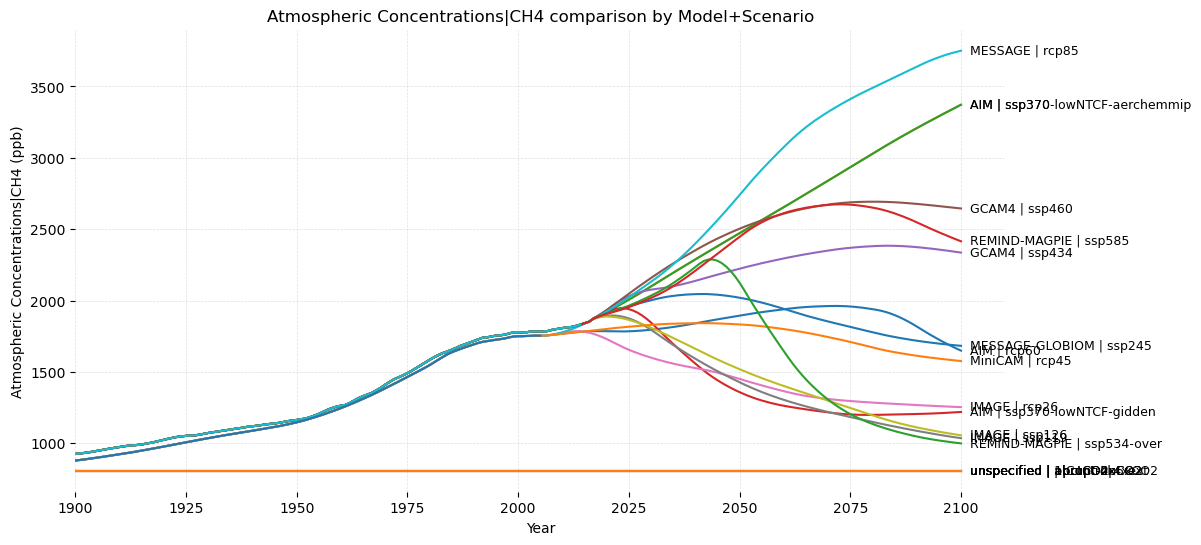

In [ ]:
import matplotlib.pyplot as plt

def plot_concentration_comparison(df, concentration_variable, compare_by='Model', scenarios=None, model=None, filter_by=None, exclude_by=None):
    """
    Plots the time series for a selected concentration variable, comparing models, scenarios, or both.
    
    Parameters:
        df (pd.DataFrame): The filtered DataFrame.
        concentration_variable (str): The concentration variable to plot (e.g., "Atmospheric Concentrations|CH4").
        compare_by (str): 'Model', 'Scenario', or 'Model+Scenario' - which to compare on the plot.
        scenarios (list of str, optional): If comparing models, filter to these scenarios.
        model (str, optional): If comparing scenarios, filter to this model.
    """
    # Filter for the selected concentration variable
    df_conc = df[df['Variable'] == concentration_variable]

    # Apply additional filtering if filter_by is provided
    if filter_by is not None:
        for col, val in filter_by.items():
            df_conc = df_conc[df_conc[col] == val]
    # Exclude rows if exclude_by is provided
    if exclude_by is not None:
        for col, val in exclude_by.items():
            if isinstance(val, (list, tuple, set)):
                df_conc = df_conc[~df_conc[col].isin(val)]
            else:
                df_conc = df_conc[df_conc[col] != val]
    
    # Further filter by scenario or model if specified
    if compare_by == 'Model' and scenarios is not None:
        df_conc = df_conc[df_conc['Scenario'].isin(scenarios)]
    elif compare_by == 'Scenario' and model is not None:
        df_conc = df_conc[df_conc['Model'] == model]
    elif compare_by == 'Model+Scenario':
        df_conc = df_conc.copy()
        df_conc['Model+Scenario'] = df_conc['Model'] + ' | ' + df_conc['Scenario']
    
    # Get year columns
    year_cols = [col for col in df_conc.columns if col.isdigit()]
    years = [int(col) for col in year_cols]
    
    plt.figure(figsize=(12, 6))
    
    group_col = compare_by if compare_by in ['Model', 'Scenario'] else 'Model+Scenario'
    offset = (years[-1] - years[0]) * 0.01  # Small offset to the right
    for key, grp in df_conc.groupby(group_col):
        y = grp[year_cols].values.squeeze()
        if y.ndim == 1:
            mask = ~pd.isna(y)
            if mask.any():
                plt.plot(np.array(years)[mask], y[mask])
                last_valid_idx = np.where(mask)[0][-1]
                plt.text(years[last_valid_idx] + offset, y[last_valid_idx], str(key), fontsize=9, va='center')
        else:
            for row in y:
                mask = ~pd.isna(row)
                if mask.any():
                    plt.plot(np.array(years)[mask], row[mask])
                    last_valid_idx = np.where(mask)[0][-1]
                    plt.text(years[last_valid_idx] + offset, row[last_valid_idx], str(key), fontsize=9, va='center')

    plt.xlabel('Year')
    plt.ylabel(f"{concentration_variable} ({df_conc['Unit'].iloc[0]})")
    plt.title(f"{concentration_variable} comparison by {compare_by}")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
    plt.xlim(years[0], years[-1] + 5 * offset)  # Extend x-axis for labels
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)    # Remove left border
    ax.spines['bottom'].set_visible(False)  # Remove bottom border
    plt.show()

# Example usage:
# To compare CH4: 1 Model, Various Scenarios
plot_concentration_comparison(df_conc_filtered, "Atmospheric Concentrations|CH4", compare_by='Scenario', model="AIM")
# To compare CH4: 1 Scenario, Various Models
plot_concentration_comparison(df_conc_filtered, "Atmospheric Concentrations|CH4", compare_by='Model', scenarios=["rcp45", "ssp245"])
# To compare CH4: All Model+Scenario combinations
plot_concentration_comparison(df_conc_filtered, "Atmospheric Concentrations|CH4", compare_by='Model+Scenario')


## Visualize Radiative Forcing

In [60]:
# List of radiative forcing variables to keep
forcing_variables_to_keep = [
    "Effective Radiative Forcing",
    "Effective Radiative Forcing|Anthropogenic",
    "Effective Radiative Forcing|Anthropogenic|CH4",
    "Effective Radiative Forcing|Anthropogenic|CO2",
    "Effective Radiative Forcing|Anthropogenic|N2O"
]

# Filter the DataFrame by variable
df_forcing_filtered = df_forc[df_forc['Variable'].isin(forcing_variables_to_keep)]

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_forcing_filtered.columns] + \
                  [col for col in year_columns if col in df_forcing_filtered.columns]

df_forcing_filtered = df_forcing_filtered[columns_to_keep]

# Display the filtered DataFrame
print("Filtered Forcing (1900-2100):")
#display(df_forcing_filtered.head())

Filtered Forcing (1900-2100):


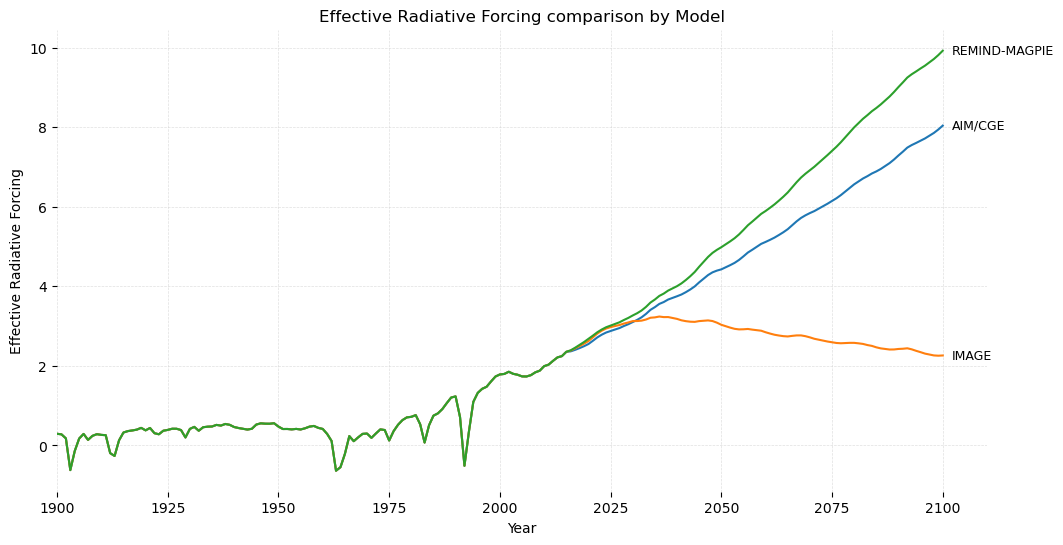

posx and posy should be finite values
posx and posy should be finite values


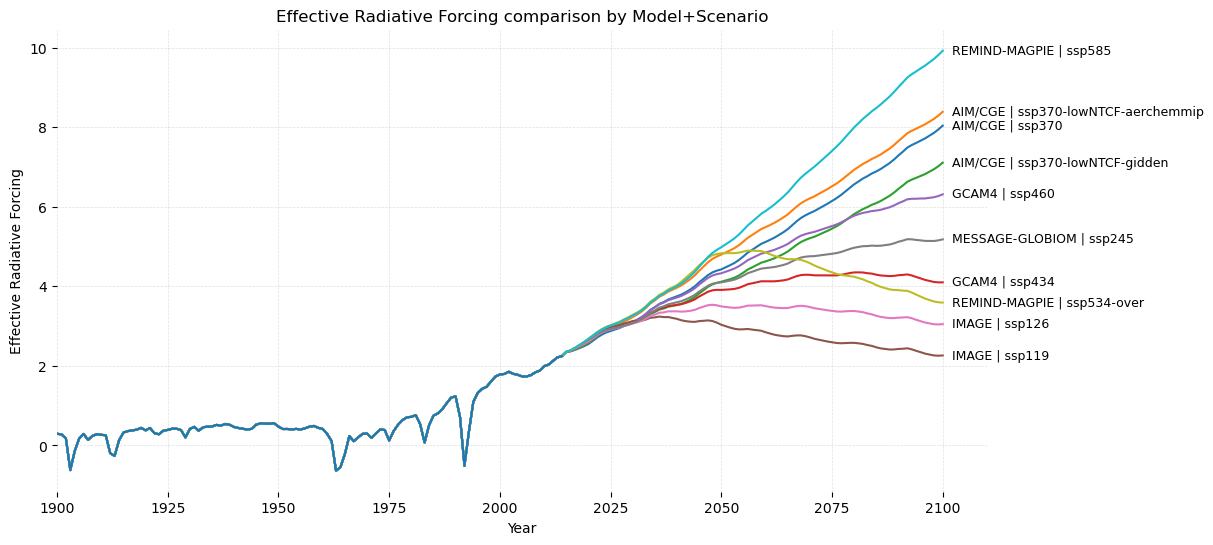

In [ ]:
def plot_forcing_comparison(df, forcing_variable, compare_by='Model', scenarios=None, model=None, filter_by=None, exclude_by=None):
    """
    Plots the time series for a selected forcing variable, comparing models, scenarios, or both.
    
    Parameters:
        df (pd.DataFrame): The filtered DataFrame.
        forcing_variable (str): The forcing variable to plot.
        compare_by (str): 'Model', 'Scenario', or 'Model+Scenario' - which to compare on the plot.
        scenarios (list of str, optional): If comparing models, filter to these scenarios.
        model (str, optional): If comparing scenarios, filter to this model.
    """
    # Filter for the selected forcing variable
    df_force = df[df['Variable'] == forcing_variable]

    # Apply additional filtering if filter_by is provided
    if filter_by is not None:
        for col, val in filter_by.items():
            df_force = df_force[df_force[col] == val]
    # Exclude rows if exclude_by is provided
    if exclude_by is not None:
        for col, val in exclude_by.items():
            if isinstance(val, (list, tuple, set)):
                df_force = df_force[~df_force[col].isin(val)]
            else:
                df_force = df_force[df_force[col] != val]
    
    # Further filter by scenario or model if specified
    if compare_by == 'Model' and scenarios is not None:
        df_force = df_force[df_force['Scenario'].isin(scenarios)]
    elif compare_by == 'Scenario' and model is not None:
        df_force = df_force[df_force['Model'] == model]
    elif compare_by == 'Model+Scenario':
        df_force = df_force.copy()
        df_force['Model+Scenario'] = df_force['Model'] + ' | ' + df_force['Scenario']
    
    # Get year columns
    year_cols = [col for col in df_force.columns if col.isdigit()]
    years = [int(col) for col in year_cols]
    
    plt.figure(figsize=(12, 6))
    
    group_col = compare_by if compare_by in ['Model', 'Scenario'] else 'Model+Scenario'
    offset = (years[-1] - years[0]) * 0.01  # Small offset to the right
    for key, grp in df_force.groupby(group_col):
        y = grp[year_cols].values.squeeze()
        if y.ndim == 1:
            mask = ~pd.isna(y)
            if mask.any():
                plt.plot(np.array(years)[mask], y[mask])
                last_valid_idx = np.where(mask)[0][-1]
                plt.text(years[last_valid_idx] + offset, y[last_valid_idx], str(key), fontsize=9, va='center')
        else:
            for row in y:
                mask = ~pd.isna(row)
                if mask.any():
                    plt.plot(np.array(years)[mask], row[mask])
                    last_valid_idx = np.where(mask)[0][-1]
                    plt.text(years[last_valid_idx] + offset, row[last_valid_idx], str(key), fontsize=9, va='center')

    plt.xlabel('Year')
    plt.ylabel(forcing_variable)
    plt.title(f"{forcing_variable} comparison by {compare_by}")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
    plt.xlim(years[0], years[-1] + 5 * offset)  # Extend x-axis for labels
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)    # Remove left border
    ax.spines['bottom'].set_visible(False)  # Remove bottom border
    plt.show()

# Example usage:
plot_forcing_comparison(df_forcing_filtered, "Effective Radiative Forcing", compare_by='Model', scenarios=["ssp119", "ssp370","ssp585"])
# To compare CO2: All Model+Scenario combinations
plot_forcing_comparison(df_forcing_filtered, "Effective Radiative Forcing", compare_by='Model+Scenario')


## Visualize GHG Emissions

In [68]:
# List of emissions variables to keep
emissions_variables_to_keep = [
    "Emissions|CO2",
    "Emissions|N2O",
    "Emissions|CH4"
]

# Filter the DataFrame by variable
df_emis_filtered = df_emis[df_emis['Variable'].isin(emissions_variables_to_keep)]

# Filter the DataFrame by region (if you want only 'World', as with concentrations)
df_emis_filtered = df_emis_filtered[df_emis_filtered['Region'] == 'World']

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_emis_filtered.columns] + \
                  [col for col in year_columns if col in df_emis_filtered.columns]

df_emis_filtered = df_emis_filtered[columns_to_keep]

# Display the filtered DataFrame
print("Filtered Emissions (1900-2100):")
display(df_emis_filtered.head())



Filtered Emissions (1900-2100):


,Model,Scenario,Region,Variable,Unit,1900,1901,1902,1903,1904,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
1,AIM,rcp60,World,Emissions|CH4,Mt CH4/yr,123.739050,124.841500,125.943960,127.046420,128.148870,...,267.60942,265.205640,262.801860,260.398080,257.994300,255.590520,253.186740,250.782960,248.379180,245.975400
3,AIM,rcp60,World,Emissions|CO2,Mt CO2/yr,4353.089657,4601.458290,4652.903310,4926.793483,5031.741843,...,53142.87000,52915.206667,52687.543333,52459.880000,52232.216667,52004.553333,51776.890000,51549.226667,51321.563333,51093.900000
34,AIM,rcp60,World,Emissions|N2O,kt N2O/yr,1465.392029,1484.476557,1508.462450,1536.302554,1567.074206,...,19408.29000,19394.194286,19380.098571,19366.002857,19351.907143,19337.811429,19323.715714,19309.620000,19295.524286,19281.428571
56,AIM/CGE,ssp370,World,Emissions|CH4,Mt CH4/yr,87.613288,88.391167,89.262825,89.890741,91.356749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777.732192
72,AIM/CGE,ssp370,World,Emissions|CO2,Mt CO2/yr,4465.964118,4768.881211,4835.690374,5115.661449,5244.746846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82725.833121


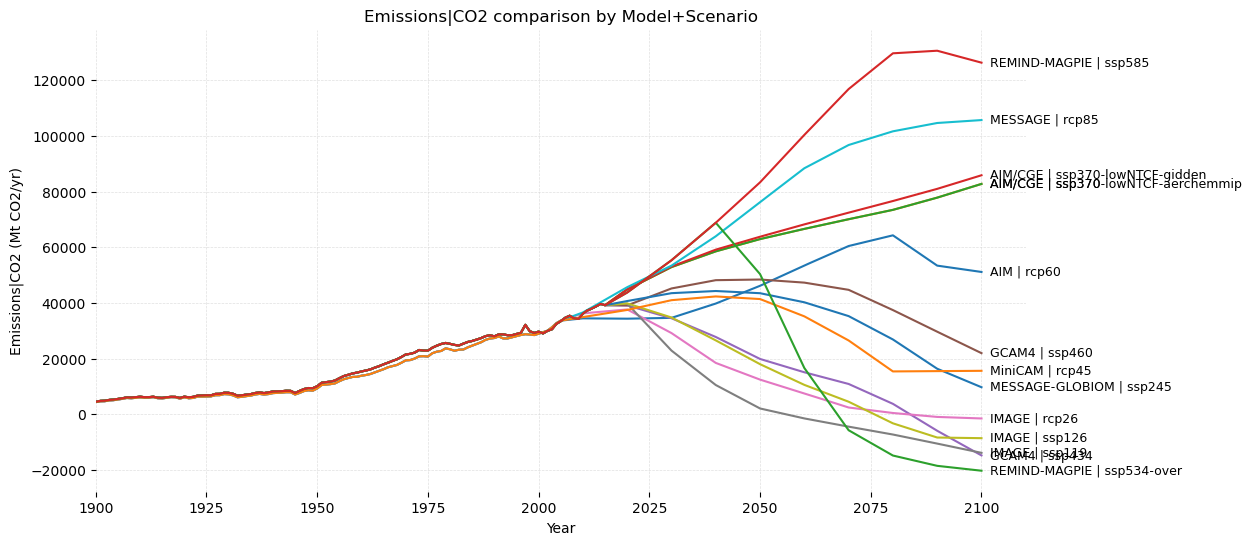

In [97]:
def plot_emissions_comparison(df, emissions_variable, compare_by='Model', scenarios=None, model=None, filter_by=None, exclude_by=None):
    """
    Plots the time series for a selected emissions variable, comparing models, scenarios, or both.
    
    Parameters:
        df (pd.DataFrame): The filtered DataFrame.
        emissions_variable (str): The emissions variable to plot (e.g., "Emissions|CH4").
        compare_by (str): 'Model', 'Scenario', or 'Model+Scenario' - which to compare on the plot.
        scenarios (list of str, optional): If comparing models, filter to these scenarios.
        model (str, optional): If comparing scenarios, filter to this model.
    """
    # Filter for the selected emissions variable
    df_em = df[df['Variable'] == emissions_variable]

    # Apply additional filtering if filter_by is provided
    if filter_by is not None:
        for col, val in filter_by.items():
            df_em = df_em[df_em[col] == val]
    # Exclude rows if exclude_by is provided
    if exclude_by is not None:
        for col, val in exclude_by.items():
            if isinstance(val, (list, tuple, set)):
                df_em = df_em[~df_em[col].isin(val)]
            else:
                df_em = df_em[df_em[col] != val]
    
    # Further filter by scenario or model if specified
    if compare_by == 'Model' and scenarios is not None:
        df_em = df_em[df_em['Scenario'].isin(scenarios)]
    elif compare_by == 'Scenario' and model is not None:
        df_em = df_em[df_em['Model'] == model]
    elif compare_by == 'Model+Scenario':
        df_em = df_em.copy()
        df_em['Model+Scenario'] = df_em['Model'] + ' | ' + df_em['Scenario']
    
    # Get year columns
    year_cols = [col for col in df_em.columns if col.isdigit()]
    years = [int(col) for col in year_cols]
    
    plt.figure(figsize=(12, 6))
    offset = (years[-1] - years[0]) * 0.01  # Small offset to the right
    group_col = compare_by if compare_by in ['Model', 'Scenario'] else 'Model+Scenario'
    for key, grp in df_em.groupby(group_col):
        y = grp[year_cols].values.squeeze()
        if y.ndim == 1:
            mask = ~pd.isna(y)
            if mask.any():
                plt.plot(np.array(years)[mask], y[mask])
                last_valid_idx = np.where(mask)[0][-1]
                plt.text(years[last_valid_idx] + offset, y[last_valid_idx], str(key), fontsize=9, va='center')
        else:
            for row in y:
                mask = ~pd.isna(row)
                if mask.any():
                    plt.plot(np.array(years)[mask], row[mask])
                    last_valid_idx = np.where(mask)[0][-1]
                    plt.text(years[last_valid_idx] + offset, row[last_valid_idx], str(key), fontsize=9, va='center')
    
    plt.xlabel('Year')
    plt.ylabel(f"{emissions_variable} ({df_em['Unit'].iloc[0]})")
    plt.title(f"{emissions_variable} comparison by {compare_by}")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
    plt.xlim(years[0], years[-1] + 5 * offset)  # Extend x-axis for labels
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

# Example usage:
plot_emissions_comparison(df_emis_filtered, "Emissions|CO2", compare_by='Model+Scenario', exclude_by={'Model': ['idealised', "unspecified", 'CEDS/UVA/GCP/PRIMAP']})
